# 데이터 전처리


In [2]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Import required libraries
import os
import zipfile
from urllib.request import urlretrieve

In [3]:
file_name = 'combined_reviews.csv' # 파일 제목 넣기
file_path = os.path.join(os.getcwd(), file_name)
print(file_path)

/content/combined_reviews.csv


In [6]:
# 파일 업로드해야 함
master_df = pd.read_csv(
    file_path,
    usecols=[0, 1, 2, 3, 4],
    names=["user", "item", "user_rating", "avg_rating", "url"],
    encoding='latin1', #
    skiprows=1  # 첫 번째 행 제외
)


# 결과 출력
print(f"불러온 csv파일 shape: {master_df.shape}")
print(master_df.head())

불러온 csv파일 shape: (75910, 5)
  user                                     item  user_rating  avg_rating  \
0  NaN              Bloemendal Tyger Syrah 2016          4.0         0.0   
1  NaN                     HachÃ³n Reserva 2018          4.0         3.9   
2  NaN              Elda Vino Al Popolo Pop Pop          3.5         3.7   
3  NaN  El Esteco Don David Reserve Malbec 2022          4.0         3.9   
4  NaN                Falesco Tellus Syrah 2015          4.0         3.7   

                                              url  
0  https://www.vivino.com/users/jean-paul.coetser  
1  https://www.vivino.com/users/jean-paul.coetser  
2  https://www.vivino.com/users/jean-paul.coetser  
3  https://www.vivino.com/users/jean-paul.coetser  
4  https://www.vivino.com/users/jean-paul.coetser  


In [7]:
# 'user' 열에서 NaN 값을 URL의 사용자 ID로 대체
master_df['user'] = master_df.apply(
    lambda row: row['url'].split('/')[-1] if pd.isna(row['user']) else row['user'], axis=1
)

In [8]:
master_df

,user,item,user_rating,avg_rating,url
0,jean-paul.coetser,Bloemendal Tyger Syrah 2016,4.0,0.0,https://www.vivino.com/users/jean-paul.coetser
1,jean-paul.coetser,HachÃ³n Reserva 2018,4.0,3.9,https://www.vivino.com/users/jean-paul.coetser
2,jean-paul.coetser,Elda Vino Al Popolo Pop Pop,3.5,3.7,https://www.vivino.com/users/jean-paul.coetser
3,jean-paul.coetser,El Esteco Don David Reserve Malbec 2022,4.0,3.9,https://www.vivino.com/users/jean-paul.coetser
4,jean-paul.coetser,Falesco Tellus Syrah 2015,4.0,3.7,https://www.vivino.com/users/jean-paul.coetser
...,...,...,...,...,...
75905,Benjamin Lacina,Gardienne des Vignes Ghost Clones Coffaro Vine...,4.0,4.1,https://www.vivino.com/users/benjamin.laci
75906,Benjamin Lacina,Donati Sisters Forever Unoaked Chardonnay 2017,3.0,3.8,https://www.vivino.com/users/benjamin.laci
75907,Benjamin Lacina,Courtney Benham Chardonnay 2018,3.5,3.7,https://www.vivino.com/users/benjamin.laci
75908,Benjamin Lacina,Raeburn Chardonnay 2016,4.5,4.1,https://www.vivino.com/users/benjamin.laci


In [41]:
master_df.isnull().sum()

,0
user,0
item,0
user_rating,0
avg_rating,0
url,0
rating,0


기본 통계
* 유저, 아이템 수
* 유저별 평가 수 등..

In [9]:
# 유저별 평가 수
master_df.groupby('user').agg({'item': len}).agg({'item':[min, max, np.mean, len]})

<ipython-input-9-6fecc4c3bfb9>:2: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  master_df.groupby('user').agg({'item': len}).agg({'item':[min, max, np.mean, len]})
<ipython-input-9-6fecc4c3bfb9>:2: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  master_df.groupby('user').agg({'item': len}).agg({'item':[min, max, np.mean, len]})
<ipython-input-9-6fecc4c3bfb9>:2: FutureWarning: The provided callable <function mean at 0x7c8f19fd55a0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  master_df.groupby('user').agg({'item': l

,item
min,1.000000
max,1743.000000
mean,231.432927
len,328.000000


In [10]:
# 와인별 평가 수 - movielens 데이터에서는 mean이 56 정도..
master_df.groupby('item').agg({'user': len}).agg({'user':[min, max, np.mean, len]})

<ipython-input-10-67cfe37c2c2d>:2: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  master_df.groupby('item').agg({'user': len}).agg({'user':[min, max, np.mean, len]})
<ipython-input-10-67cfe37c2c2d>:2: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  master_df.groupby('item').agg({'user': len}).agg({'user':[min, max, np.mean, len]})
<ipython-input-10-67cfe37c2c2d>:2: FutureWarning: The provided callable <function mean at 0x7c8f19fd55a0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  master_df.groupby('item').agg({'user'

,user
min,1.000000
max,70.000000
mean,1.174496
len,64632.000000


In [11]:
# 점수대별 user_rating
master_df.groupby('user_rating').agg({'item':len})

,item
user_rating,
1.0,296
1.5,167
2.0,1466
2.5,1394
3.0,19234
3.5,12405
4.0,30564
4.5,6839
5.0,3545


<Axes: xlabel='user_rating'>

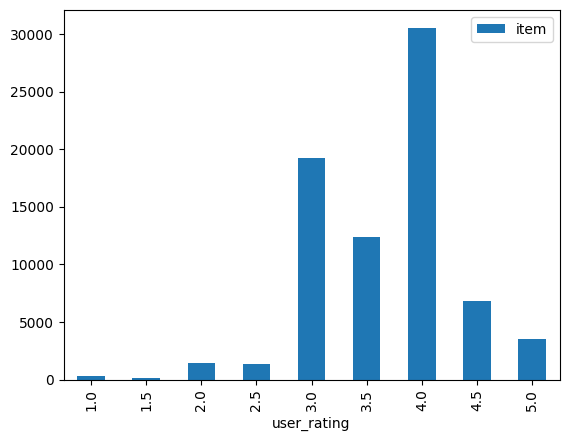

In [12]:
# 확실히 skewed됨
master_df.groupby('user_rating').agg({'item':len}).plot.bar()

## 전처리
* user, item 인덱스 0부터 부여
* explicit to implicit
* train, val, test 비율 => 8:1:1

In [13]:
unique_users = master_df['user'].unique()
unique_items = master_df['item'].unique()

In [14]:
# indexing (labelEncoding)
user2id = {user: idx for idx, user in enumerate(unique_users)}
id2user = {idx: user for idx, user in enumerate(unique_users)}

item2id = {item: idx for idx, item in enumerate(unique_items)}
id2item = {idx: item for idx, item in enumerate(unique_items)}

master_df['user'] = master_df['user'].map(user2id)
master_df['item'] = master_df['item'].map(item2id)

master_df

,user,item,user_rating,avg_rating,url
0,0,0,4.0,0.0,https://www.vivino.com/users/jean-paul.coetser
1,0,1,4.0,3.9,https://www.vivino.com/users/jean-paul.coetser
2,0,2,3.5,3.7,https://www.vivino.com/users/jean-paul.coetser
3,0,3,4.0,3.9,https://www.vivino.com/users/jean-paul.coetser
4,0,4,4.0,3.7,https://www.vivino.com/users/jean-paul.coetser
...,...,...,...,...,...
75905,327,64308,4.0,4.1,https://www.vivino.com/users/benjamin.laci
75906,327,64629,3.0,3.8,https://www.vivino.com/users/benjamin.laci
75907,327,64630,3.5,3.7,https://www.vivino.com/users/benjamin.laci
75908,327,11902,4.5,4.1,https://www.vivino.com/users/benjamin.laci


In [15]:
# rating을 남겼으면 rating = 1(interaction이 있다고 정의)
master_df.loc[:, 'rating'] = 1

In [ ]:
# item 열에서 고유한 와인 ID 추출
# 데이터 저장에 필요한 코드 (밑에도 있음)
all_wines = master_df['item'].unique()

# 결과 확인
print(f"Total unique items (wines): {len(all_wines)}")
print(all_wines[:10])

In [17]:
master_df

,user,item,user_rating,avg_rating,url,rating
0,0,0,4.0,0.0,https://www.vivino.com/users/jean-paul.coetser,1
1,0,1,4.0,3.9,https://www.vivino.com/users/jean-paul.coetser,1
2,0,2,3.5,3.7,https://www.vivino.com/users/jean-paul.coetser,1
3,0,3,4.0,3.9,https://www.vivino.com/users/jean-paul.coetser,1
4,0,4,4.0,3.7,https://www.vivino.com/users/jean-paul.coetser,1
...,...,...,...,...,...,...
75905,327,64308,4.0,4.1,https://www.vivino.com/users/benjamin.laci,1
75906,327,64629,3.0,3.8,https://www.vivino.com/users/benjamin.laci,1
75907,327,64630,3.5,3.7,https://www.vivino.com/users/benjamin.laci,1
75908,327,11902,4.5,4.1,https://www.vivino.com/users/benjamin.laci,1


- interaction 정의를 가장 basic한 방법으로 정의
- user_rating과 avg_rating 비교, user_rating > 3.5 기준으로 분류할 수도 있음


In [19]:
# interaction 정의
# 방식은 여러가지가 있지만, 우선 가장 간단하게 rating
ratings = master_df.loc[:, ['user', 'item', 'rating']]
ratings


,user,item,rating
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1
...,...,...,...
75905,327,64308,1
75906,327,64629,1
75907,327,64630,1
75908,327,11902,1


In [23]:
ratings_sorted = ratings.sort_values(by=['user'])
ratings_sorted

,user,item,rating
0,0,0,1
35,0,35,1
36,0,36,1
37,0,37,1
38,0,38,1
...,...,...,...
75247,327,64140,1
75248,327,64141,1
75249,327,64142,1
75236,327,64130,1


In [25]:
# 각 유저별로 train, validation, test 데이터로 분할 (8:1:1 비율)
train, temp = train_test_split(ratings_sorted, test_size=0.2,  random_state=42) #stratify=ratings_sorted['user'], -> 유저당 리뷰 수가 너무 적으면 split이 안됨
val, test = train_test_split(temp, test_size=0.5,  random_state=42) #stratify=temp['user'],

In [28]:
# 결과 확인
print("Train:", len(train))
print("Validation:", len(val))
print("Test:", len(test))

Train: 60728
Validation: 7591
Test: 7591


In [29]:
# user=1인 데이터의 전체 개수, train 데이터 개수, validation 데이터 개수, test 데이터 개수
len(ratings_sorted[ratings_sorted['user']==1]), len(train[train['user']==1]), len(val[val['user']==1]), len(test[test['user']==1])

(262, 218, 18, 26)

##데이터셋으로 저장
	•	train, val, test:
	•	학습(train), 검증(val), 테스트(test) 데이터를 저장합니다.
	•	각각 train_test_split로 분할된 데이터셋입니다.
	•	all_items (e.g., all_movies):
	•	전체 아이템(영화, 상품 등)의 ID 리스트입니다.
	•	예를 들어, train, val, test에 등장하는 모든 고유한 item을 포함합니다.
	•	user2id & id2user:
	•	user2id: 사용자 이름(혹은 ID)을 숫자로 매핑한 딕셔너리입니다.
	•	예: {"jean-paul": 0, "benjamin": 1, ...}
	•	id2user: 반대로 숫자를 사용자 이름으로 매핑한 딕셔너리입니다.
	•	예: {0: "jean-paul", 1: "benjamin", ...}
	•	데이터셋을 숫자 형태로 변환해 모델 학습에 사용하려고 정의된 것입니다.
	•	item2id & id2item:
	•	item2id: 아이템 이름(혹은 ID)을 숫자로 매핑한 딕셔너리입니다.
	•	예: {"item_1": 0, "item_2": 1, ...}
	•	id2item: 반대로 숫자를 아이템 이름으로 매핑한 딕셔너리입니다.
	•	예: {0: "item_1", 1: "item_2", ...}

In [27]:
import pickle

In [32]:
# item 열에서 고유한 와인 ID 추출
all_wines = master_df['item'].unique()

# 결과 확인
print(f"Total unique items (wines): {len(all_wines)}")
print(all_wines[:10])  # 처음 10개의 아이템 출력

Total unique items (wines): 64632
[0 1 2 3 4 5 6 7 8 9]


In [33]:
result = {
    "train": train,
    "val" : val,
    "test" : test,
    "all_items": all_wines,
    "user2id" : user2id,
    "id2user" : id2user,
    "item2id" : item2id,
    "id2item" : id2item,
}

In [40]:
print(train["user"].head())

16552     56
9820      14
42454    173
17779     60
35376    131
Name: user, dtype: int64


In [42]:
# 혹시나 결측치 확인
print(train.isna().sum())
print(val.isna().sum())
print(test.isna().sum())

user      0
item      0
rating    0
dtype: int64
user      0
item      0
rating    0
dtype: int64
user      0
item      0
rating    0
dtype: int64


In [34]:
with open('reviews_splited.pkl', 'wb') as f:
    pickle.dump(result, f)

negative sampling 예시

In [35]:
all_movies = ratings['item'].unique()

users, items, labels = [], [], []

user_item_set = set(zip(train['user'], train['item']))

num_neg = 4

for u, i in tqdm(user_item_set):
    users.append(u)
    items.append(i)
    labels.append(1)
    for _ in range(num_neg):
        neg_item = np.random.choice(all_movies)
        while (u, neg_item) in user_item_set:
            neg_item = np.random.choice(all_movies)
        users.append(u)
        items.append(neg_item)
        labels.append(0)

100%|██████████| 57738/57738 [00:04<00:00, 12156.06it/s]


In [36]:
list(zip(users, items, labels))

[(129, 31296, 1),
 (129, 32505, 0),
 (129, 4150, 0),
 (129, 18749, 0),
 (129, 18635, 0),
 (112, 25465, 1),
 (112, 2862, 0),
 (112, 33488, 0),
 (112, 24435, 0),
 (112, 40920, 0),
 (233, 48615, 1),
 (233, 18366, 0),
 (233, 19298, 0),
 (233, 55963, 0),
 (233, 25838, 0),
 (98, 23315, 1),
 (98, 22736, 0),
 (98, 6281, 0),
 (98, 28864, 0),
 (98, 15137, 0),
 (144, 34802, 1),
 (144, 32891, 0),
 (144, 37576, 0),
 (144, 58586, 0),
 (144, 8060, 0),
 (248, 52121, 1),
 (248, 33195, 0),
 (248, 52678, 0),
 (248, 24829, 0),
 (248, 11441, 0),
 (96, 22488, 1),
 (96, 45572, 0),
 (96, 40614, 0),
 (96, 10487, 0),
 (96, 39383, 0),
 (270, 55852, 1),
 (270, 939, 0),
 (270, 18054, 0),
 (270, 33455, 0),
 (270, 42585, 0),
 (304, 61098, 1),
 (304, 13021, 0),
 (304, 45763, 0),
 (304, 60730, 0),
 (304, 18016, 0),
 (10, 5940, 1),
 (10, 16664, 0),
 (10, 61015, 0),
 (10, 60731, 0),
 (10, 39082, 0),
 (238, 49898, 1),
 (238, 292, 0),
 (238, 45187, 0),
 (238, 32229, 0),
 (238, 15194, 0),
 (289, 59477, 1),
 (289, 39231, 0)

In [37]:
# Negative sampling이 잘 되었는지 검정

# Positive와 Negative Sample의 개수 확인
from collections import Counter

label_counts = Counter(labels)
print(f"Positive Samples: {label_counts[1]}")
print(f"Negative Samples: {label_counts[0]}")

# Negative Sample이 실제 데이터에 포함되지 않았는지 확인
invalid_neg_samples = [
    (u, i) for u, i, label in zip(users, items, labels)
    if label == 0 and (u, i) in user_item_set
]
print(f"Invalid Negative Samples: {len(invalid_neg_samples)}")
assert len(invalid_neg_samples) == 0, "Negative Samples contain real data!"

# 사용자당 Positive Sample이 최소 1개씩 있는지 확인
positive_samples_per_user = Counter([u for u, label in zip(users, labels) if label == 1])
print(f"Users without Positive Samples: {[u for u in train['user'].unique() if positive_samples_per_user[u] == 0]}")

Positive Samples: 57738
Negative Samples: 230952
Invalid Negative Samples: 0
Users without Positive Samples: []
